# Credit Card Fraud Detection using Machine Learning

Fraud detection is a real-world business problem where a company wants to detect
fraudulent transactions before money is lost.

This is a difficult problem because:
- Fraud cases are extremely rare.
- Most transactions are normal.
- The dataset is highly imbalanced.

In this project, we build a machine learning model to detect fraud
and focus on the correct evaluation metrics.


## Importing Required Libraries

These libraries are used for:
- Data handling
- Model training
- Evaluation
- Saving the trained model


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

## Loading the Dataset

Each row represents a credit card transaction.
The target column is "Class".


In [2]:
df = pd.read_csv("creditcard.csv")
df.head()


/tmp/ipython-input-2290665590.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("creditcard.csv")


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


## Understanding Class Imbalance

0 = Normal transaction  
1 = Fraud transaction


In [3]:
df['Class'].value_counts()


,count
Class,
0.0,136478
1.0,263


This shows that fraud cases are extremely rare.

This is why accuracy is misleading:
A model that predicts "no fraud" for everything
will still get very high accuracy.


## Separating Features and Target


In [6]:
X = df.drop("Class", axis=1)
y = df["Class"]

# Check missing values in target

In [9]:
y.isnull().sum()

np.int64(1)

# Remove rows where target is missing

In [10]:
df = df.dropna(subset=["Class"])


# Recreate X and y

In [11]:

X = df.drop("Class", axis=1)
y = df["Class"]


## Handling Missing Target Values

Some rows contain missing labels.
These rows cannot be used for supervised learning,
so they are removed.


## Splitting the Data

We use stratified splitting so both sets
maintain the same fraud ratio.


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Baseline Model – Logistic Regression

This simple model is used as a reference point.


In [13]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("Logistic Regression Report:")
print(classification_report(y_test, lr_pred))


Logistic Regression Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27296
         1.0       0.70      0.53      0.60        53

    accuracy                           1.00     27349
   macro avg       0.85      0.76      0.80     27349
weighted avg       1.00      1.00      1.00     27349



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


This shows that Logistic Regression struggles
to correctly identify fraud cases due to imbalance.


## Random Forest Model

Random Forest is an ensemble model.
It combines many decision trees to improve performance.


In [14]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest Report:")
print(classification_report(y_test, rf_pred))


Random Forest Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27296
         1.0       0.96      0.81      0.88        53

    accuracy                           1.00     27349
   macro avg       0.98      0.91      0.94     27349
weighted avg       1.00      1.00      1.00     27349



Random Forest improves recall,
which means it catches more fraud cases.
In fraud detection, missing a fraud is worse than a false alarm.


## Feature Importance Interpretation

The top features such as V17, V12, and V14 have the highest influence on fraud prediction.

Since the dataset uses anonymized PCA features, the real meaning of these variables is hidden.
However, their high importance indicates strong statistical patterns related to fraud.

Feature importance helps in:
- Understanding model behavior
- Building trust in predictions
- Explaining decisions to stakeholders


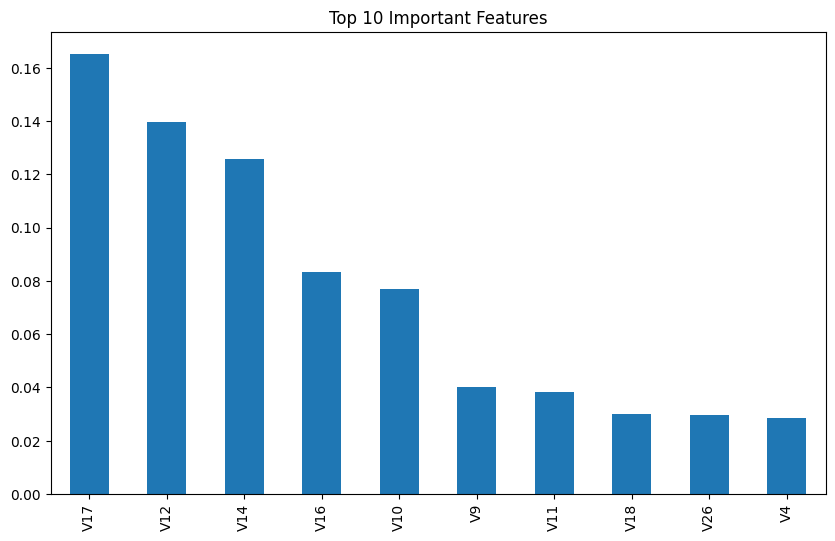

In [15]:
importances = rf.feature_importances_
features = X.columns

fi = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
fi.head(10).plot(kind='bar')
plt.title("Top 10 Important Features")
plt.savefig("feature_importance.png")
plt.show()


Feature importance helps explain model behavior.
This is important for trust, auditing, and compliance.


## Saving the Model

The trained model is saved so it can be reused
without retraining.


In [16]:
joblib.dump(rf, "fraud_model.pkl")


['fraud_model.pkl']

## Final Summary

- Fraud detection is an imbalanced classification problem.
- Accuracy is not a reliable metric.
- Logistic Regression is used as a baseline.
- Random Forest performs better on rare fraud cases.
- Feature importance provides explainability.
- The model is saved for real-world deployment.
